In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Попробуем предсказать популярность Аниме по   
жанрам к которым оно относится   
полнометражный фильм или сериал   
количество эпизодов   
средний рейтинг

In [2]:
data = pd.read_csv ('anime.csv')
data.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [3]:
data ['type'] = (data ['type'] == 'TV')
data ['episodes'][data['episodes'] == 'Unknown'] = float('Nan')
data = data.dropna()
data.index = range (data.shape[0])

/Users/alexgorbonos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [4]:
data.shape

(11830, 7)

Посмотрим как кол-во фанатов соответсвует рейтингу   

Text(0, 0.5, 'rating')

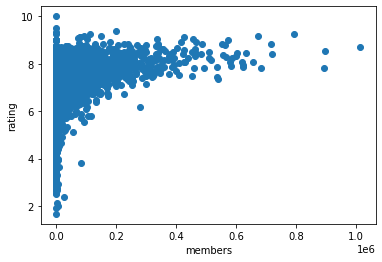

In [5]:
plt.scatter (data['members'], data['rating'])
plt.xlabel ('members')
plt.ylabel ('rating')

Вытащим из каждой строки набор жанров и сохраним в сет   
Так как в текущем виде это плохой признак

In [6]:
anime_genre = set()
for genre_seq in data['genre']:
    if type(genre_seq) == float:
        genre_seq = str(genre_seq)
    
    genre_seq = genre_seq.replace(' ', '').split(',')
    anime_genre = anime_genre.union (genre_seq)

In [7]:
anime_genre = np.asarray (list(anime_genre))
len(anime_genre)

43

Создадим словарь жанр -> id   

In [8]:
anime_genre_id = {}
i = 0
for genre in anime_genre:
    anime_genre_id [genre] = i
    i += 1
    

In [9]:
genre_encoding = np.zeros ((len(data), len(anime_genre)), dtype=bool)
i = 0
for genre_seq in data['genre']:
    if type(genre_seq) == float:
        genre_seq = str(genre_seq)
    
    genre_seq = genre_seq.replace(' ', '').split(',')
    genre_id = [anime_genre_id [genre] for genre in genre_seq]
    genre_encoding [i][genre_id] = 1
    i += 1

Посмотрим на наиболее популряные и непопулярные жанры

In [10]:
anime_genre [np.sum (genre_encoding, axis=0).argsort()[:4]]
#В основном про гомосексуальные отношения

array(['Yaoi', 'Yuri', 'Josei', 'ShoujoAi'], dtype='<U13')

In [11]:
anime_genre [np.sum (genre_encoding, axis=0).argsort()[-4:]]
#Наиболее общие и популряные

array(['Fantasy', 'Adventure', 'Action', 'Comedy'], dtype='<U13')

Посмотрим можно ли убрать непопулярные жанры (только из соображений понижения размерности!)

Text(0.5, 1.0, 'anime genre popularity')

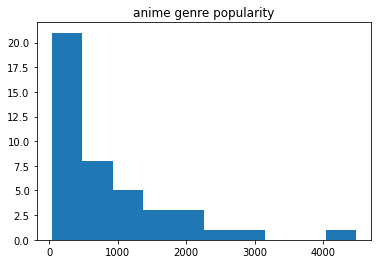

In [12]:
plt.hist(np.sum (genre_encoding, axis=0))
plt.title ('anime genre popularity')

In [13]:
np.sum (genre_encoding, axis=0)

array([ 832,   71, 2293,   54,  238,  742, 1099,  287, 2219,  170,  194,
       1550,  627,  415,  530, 2748,  927,  993,  445, 1164,  527,   86,
         62,  587, 1668, 1180,  376,  787, 1972,  100,  145,   37,  312,
       2028, 1436, 4483,  482,  360,  258,   52,  397,  226,   41])

Кажется не стоит убирать малопопулярные жанры, так как они составляют основную массу

Может быть какие то жанры хорошо коррелируют?

In [14]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(genre_encoding)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [15]:
pca.explained_variance_ratio_

array([0.11487718, 0.10528917, 0.08241536, 0.0660538 , 0.05604799,
       0.0469107 , 0.04460734, 0.03828098, 0.03594614, 0.03457613,
       0.0311875 , 0.02922603, 0.02564919, 0.02441403, 0.02250773,
       0.02009666, 0.01966747, 0.01908477, 0.01583434, 0.01530421,
       0.01391845, 0.01357649, 0.01294951, 0.01231224, 0.01148859,
       0.01059031, 0.00886346, 0.00823377, 0.00803265, 0.007414  ,
       0.00710438, 0.00658788, 0.00570437, 0.00522764, 0.00413073,
       0.003089  , 0.00255146, 0.0022417 , 0.0020141 , 0.00177121,
       0.00167843, 0.00132979, 0.00121314])

Text(0.5, 1.0, 'component varience explained')

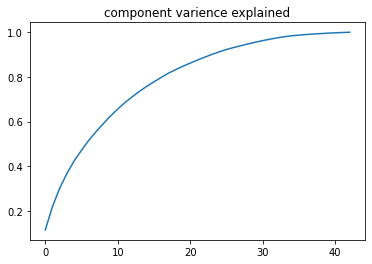

In [16]:
plt.plot (np.cumsum(pca.explained_variance_ratio_))
plt.title ('component varience explained')

Чтобы объяснить 90% данных нам нужно почти 40 компонент, что не слишком упростит модель

Создадим нужные нам датафреймы

In [17]:
genre_encoding_names = ['genre_{0}'.format(i) for i in range(len(anime_genre))]
df_genre = pd.DataFrame (genre_encoding, columns = genre_encoding_names)

In [18]:
df_genre

,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,...,genre_33,genre_34,genre_35,genre_36,genre_37,genre_38,genre_39,genre_40,genre_41,genre_42
0,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,False,False,True,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11825,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11826,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11827,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11828,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [19]:
data_y = data ['members']
data_X = pd.concat ([data[['type', 'episodes', 'rating']], df_genre], axis=1)
data_X.head()

,type,episodes,rating,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,...,genre_33,genre_34,genre_35,genre_36,genre_37,genre_38,genre_39,genre_40,genre_41,genre_42
0,False,1,9.37,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,True,64,9.26,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,True,51,9.25,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,True,False,False
3,True,24,9.17,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,True,51,9.16,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,True,False,False


In [20]:
data_X.shape, data_y.shape

((11830, 46), (11830,))

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.25)

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression ()
model.fit (X_train, y_train)
error = np.mean ((model.predict (X_test) - y_test)**2)**(1/2)

In [23]:
error, np.mean (y_test)

(48991.56875224175, 19315.742055442868)

Потрясающе плохой результат   
Попробуем что-то другое

In [24]:
cat_features = list(range(X_test.shape[1]))
cat_features.pop(1) #episodes
cat_features.pop(1) #rating

2

In [31]:
from catboost import CatBoostRegressor
model = CatBoostRegressor (iterations=1000)
model.fit (X=X_train, y=y_train, cat_features=cat_features)

Learning rate set to 0.057564
0:	learn: 53387.3473184	total: 2.93ms	remaining: 2.93s
1:	learn: 52171.8961709	total: 5.29ms	remaining: 2.64s
2:	learn: 51079.7300392	total: 8.22ms	remaining: 2.73s
3:	learn: 50016.2504269	total: 11.9ms	remaining: 2.98s
4:	learn: 49023.8518567	total: 14ms	remaining: 2.79s
5:	learn: 48107.0321287	total: 16.4ms	remaining: 2.71s
6:	learn: 47299.2808536	total: 20.5ms	remaining: 2.9s
7:	learn: 46513.4530602	total: 22.6ms	remaining: 2.8s
8:	learn: 45758.2447333	total: 26.2ms	remaining: 2.88s
9:	learn: 45115.7580758	total: 28.4ms	remaining: 2.81s
10:	learn: 44472.7698486	total: 30.4ms	remaining: 2.74s
11:	learn: 43900.5353627	total: 34.4ms	remaining: 2.83s
12:	learn: 43352.3845740	total: 36.5ms	remaining: 2.77s
13:	learn: 42864.2501806	total: 38.5ms	remaining: 2.71s
14:	learn: 42397.9361658	total: 42.5ms	remaining: 2.79s
15:	learn: 41978.9639407	total: 44.7ms	remaining: 2.75s
16:	learn: 41550.7036669	total: 47.3ms	remaining: 2.73s
17:	learn: 41202.3582939	total: 

219:	learn: 27168.2574328	total: 561ms	remaining: 1.99s
220:	learn: 27143.9680472	total: 567ms	remaining: 2s
221:	learn: 27123.9012044	total: 570ms	remaining: 2s
222:	learn: 27065.5760626	total: 574ms	remaining: 2s
223:	learn: 27045.6561611	total: 576ms	remaining: 2s
224:	learn: 27026.2414303	total: 578ms	remaining: 1.99s
225:	learn: 27007.8830672	total: 582ms	remaining: 1.99s
226:	learn: 26991.2760312	total: 585ms	remaining: 1.99s
227:	learn: 26968.8822478	total: 587ms	remaining: 1.99s
228:	learn: 26954.9210107	total: 591ms	remaining: 1.99s
229:	learn: 26929.4000147	total: 597ms	remaining: 2s
230:	learn: 26921.2692603	total: 600ms	remaining: 2s
231:	learn: 26879.0264463	total: 605ms	remaining: 2s
232:	learn: 26861.3770838	total: 609ms	remaining: 2s
233:	learn: 26836.3248796	total: 614ms	remaining: 2.01s
234:	learn: 26801.1349310	total: 619ms	remaining: 2.01s
235:	learn: 26798.3305112	total: 622ms	remaining: 2.01s
236:	learn: 26778.8254607	total: 628ms	remaining: 2.02s
237:	learn: 2674

422:	learn: 23404.2020698	total: 1.13s	remaining: 1.53s
423:	learn: 23391.6081537	total: 1.13s	remaining: 1.53s
424:	learn: 23373.1315168	total: 1.13s	remaining: 1.53s
425:	learn: 23360.5987858	total: 1.14s	remaining: 1.53s
426:	learn: 23349.8167182	total: 1.14s	remaining: 1.53s
427:	learn: 23343.3342109	total: 1.14s	remaining: 1.52s
428:	learn: 23320.3818251	total: 1.15s	remaining: 1.52s
429:	learn: 23315.1871689	total: 1.15s	remaining: 1.52s
430:	learn: 23298.1171481	total: 1.15s	remaining: 1.52s
431:	learn: 23293.0880201	total: 1.15s	remaining: 1.52s
432:	learn: 23283.4549786	total: 1.16s	remaining: 1.51s
433:	learn: 23261.1511301	total: 1.16s	remaining: 1.51s
434:	learn: 23236.7569663	total: 1.16s	remaining: 1.51s
435:	learn: 23220.5540345	total: 1.16s	remaining: 1.5s
436:	learn: 23207.1044027	total: 1.17s	remaining: 1.5s
437:	learn: 23197.0832422	total: 1.17s	remaining: 1.5s
438:	learn: 23186.5840215	total: 1.17s	remaining: 1.5s
439:	learn: 23169.0352436	total: 1.17s	remaining: 1.

570:	learn: 21605.2381841	total: 1.5s	remaining: 1.13s
571:	learn: 21581.4134658	total: 1.5s	remaining: 1.13s
572:	learn: 21565.1601616	total: 1.51s	remaining: 1.12s
573:	learn: 21561.6944568	total: 1.51s	remaining: 1.12s
574:	learn: 21546.5098688	total: 1.51s	remaining: 1.12s
575:	learn: 21523.3139934	total: 1.52s	remaining: 1.12s
576:	learn: 21499.8892029	total: 1.52s	remaining: 1.11s
577:	learn: 21477.5286029	total: 1.52s	remaining: 1.11s
578:	learn: 21459.4920904	total: 1.53s	remaining: 1.11s
579:	learn: 21456.2974335	total: 1.53s	remaining: 1.11s
580:	learn: 21451.3238356	total: 1.53s	remaining: 1.1s
581:	learn: 21446.6403117	total: 1.54s	remaining: 1.1s
582:	learn: 21432.8623591	total: 1.54s	remaining: 1.1s
583:	learn: 21411.1375284	total: 1.54s	remaining: 1.1s
584:	learn: 21398.3203807	total: 1.54s	remaining: 1.09s
585:	learn: 21393.6656114	total: 1.55s	remaining: 1.09s
586:	learn: 21384.9872215	total: 1.55s	remaining: 1.09s
587:	learn: 21369.6179792	total: 1.55s	remaining: 1.09

773:	learn: 19469.5964730	total: 2.06s	remaining: 601ms
774:	learn: 19462.9194642	total: 2.06s	remaining: 599ms
775:	learn: 19452.0013782	total: 2.07s	remaining: 597ms
776:	learn: 19451.1976146	total: 2.07s	remaining: 594ms
777:	learn: 19435.5008712	total: 2.07s	remaining: 591ms
778:	learn: 19427.0218474	total: 2.07s	remaining: 589ms
779:	learn: 19420.7475903	total: 2.08s	remaining: 586ms
780:	learn: 19410.7469765	total: 2.08s	remaining: 584ms
781:	learn: 19395.4241165	total: 2.08s	remaining: 581ms
782:	learn: 19391.0056803	total: 2.09s	remaining: 579ms
783:	learn: 19385.7201168	total: 2.09s	remaining: 576ms
784:	learn: 19379.1098056	total: 2.09s	remaining: 573ms
785:	learn: 19373.8302931	total: 2.1s	remaining: 571ms
786:	learn: 19365.1461725	total: 2.1s	remaining: 568ms
787:	learn: 19364.7086212	total: 2.1s	remaining: 565ms
788:	learn: 19351.0644966	total: 2.1s	remaining: 562ms
789:	learn: 19336.1793666	total: 2.1s	remaining: 560ms
790:	learn: 19325.5690303	total: 2.11s	remaining: 557

984:	learn: 18044.7439524	total: 2.62s	remaining: 39.9ms
985:	learn: 18042.7792343	total: 2.63s	remaining: 37.3ms
986:	learn: 18036.6948718	total: 2.63s	remaining: 34.6ms
987:	learn: 18020.9463371	total: 2.63s	remaining: 32ms
988:	learn: 18011.0606344	total: 2.63s	remaining: 29.3ms
989:	learn: 18004.9664626	total: 2.64s	remaining: 26.6ms
990:	learn: 18001.1637465	total: 2.64s	remaining: 24ms
991:	learn: 17994.6354196	total: 2.64s	remaining: 21.3ms
992:	learn: 17992.7455174	total: 2.65s	remaining: 18.7ms
993:	learn: 17981.1998905	total: 2.65s	remaining: 16ms
994:	learn: 17966.1666690	total: 2.65s	remaining: 13.3ms
995:	learn: 17962.1553868	total: 2.65s	remaining: 10.7ms
996:	learn: 17947.6850560	total: 2.66s	remaining: 7.99ms
997:	learn: 17946.2242570	total: 2.66s	remaining: 5.33ms
998:	learn: 17919.3235431	total: 2.66s	remaining: 2.66ms
999:	learn: 17907.1609647	total: 2.66s	remaining: 0us


In [30]:
error = np.mean ((model.predict (X_test) - y_test)**2)**(1/2)
error #ошибка меньше, но все еще довольно большая

34636.665822615905

Итого, предсказать популярность аниме довольно сложно и плохо получается
Вероятно помогли бы такие фичи как режиссер, студия и наличие перевода 